In [1]:
from __future__ import print_function, division

import numpy as np

plot_to_pdf = False

if plot_to_pdf:
    import matplotlib as mpl
    mpl.use('pdf')
    
    import matplotlib.pyplot as plt
    
    plt.rc('font', family='serif', serif='Times')
    plt.rc('text', usetex=True)
    plt.rc('xtick', labelsize=8) # 10
    plt.rc('ytick', labelsize=8) # 10
    plt.rc('axes', labelsize=8) # 10
    plt.rc('legend', fontsize=8) # 10
    title_font_size = 8
    data_font_size = 8
else:
    import matplotlib.pyplot as plt

%matplotlib inline

import time
from collections import OrderedDict

import pandas as pd
import seaborn as sns

%load_ext autoreload
%autoreload 2

import topological_memory_clustering
class_color = topological_memory_clustering.class_color

## Load benchmark results

In [2]:
benchmark_results = np.load('202101_datasets/202102_benchmark_results.npz', allow_pickle=True)

In [3]:
print("Keys", list(benchmark_results.keys()))

benchmark_results_random_cost = benchmark_results['benchmark_results_random_cost'].tolist()
benchmark_results_random_times = benchmark_results['benchmark_results_random_times'].tolist()

Keys ['benchmark_results_random_cost', 'benchmark_results_random_times']


# Fig. 7: Warm-start comparison

Cold-start Iterations: 36.31 +/- 14.73	 Time: 0.14 +/- 0.05
Direct learning Iterations: 37.59 +/- 42.65	 Time: 0.14 +/- 0.13
KNN Regressor Iterations: 41.27 +/- 61.93	 Time: 0.15 +/- 0.20
Proposed Method Iterations: 31.10 +/- 7.87	 Time: 0.12 +/- 0.03
Success rate for Cold-start 0.024
Success rate for MLP 0.172
Success rate for KNN Regr. 0.264
Success rate for Proposed 0.998


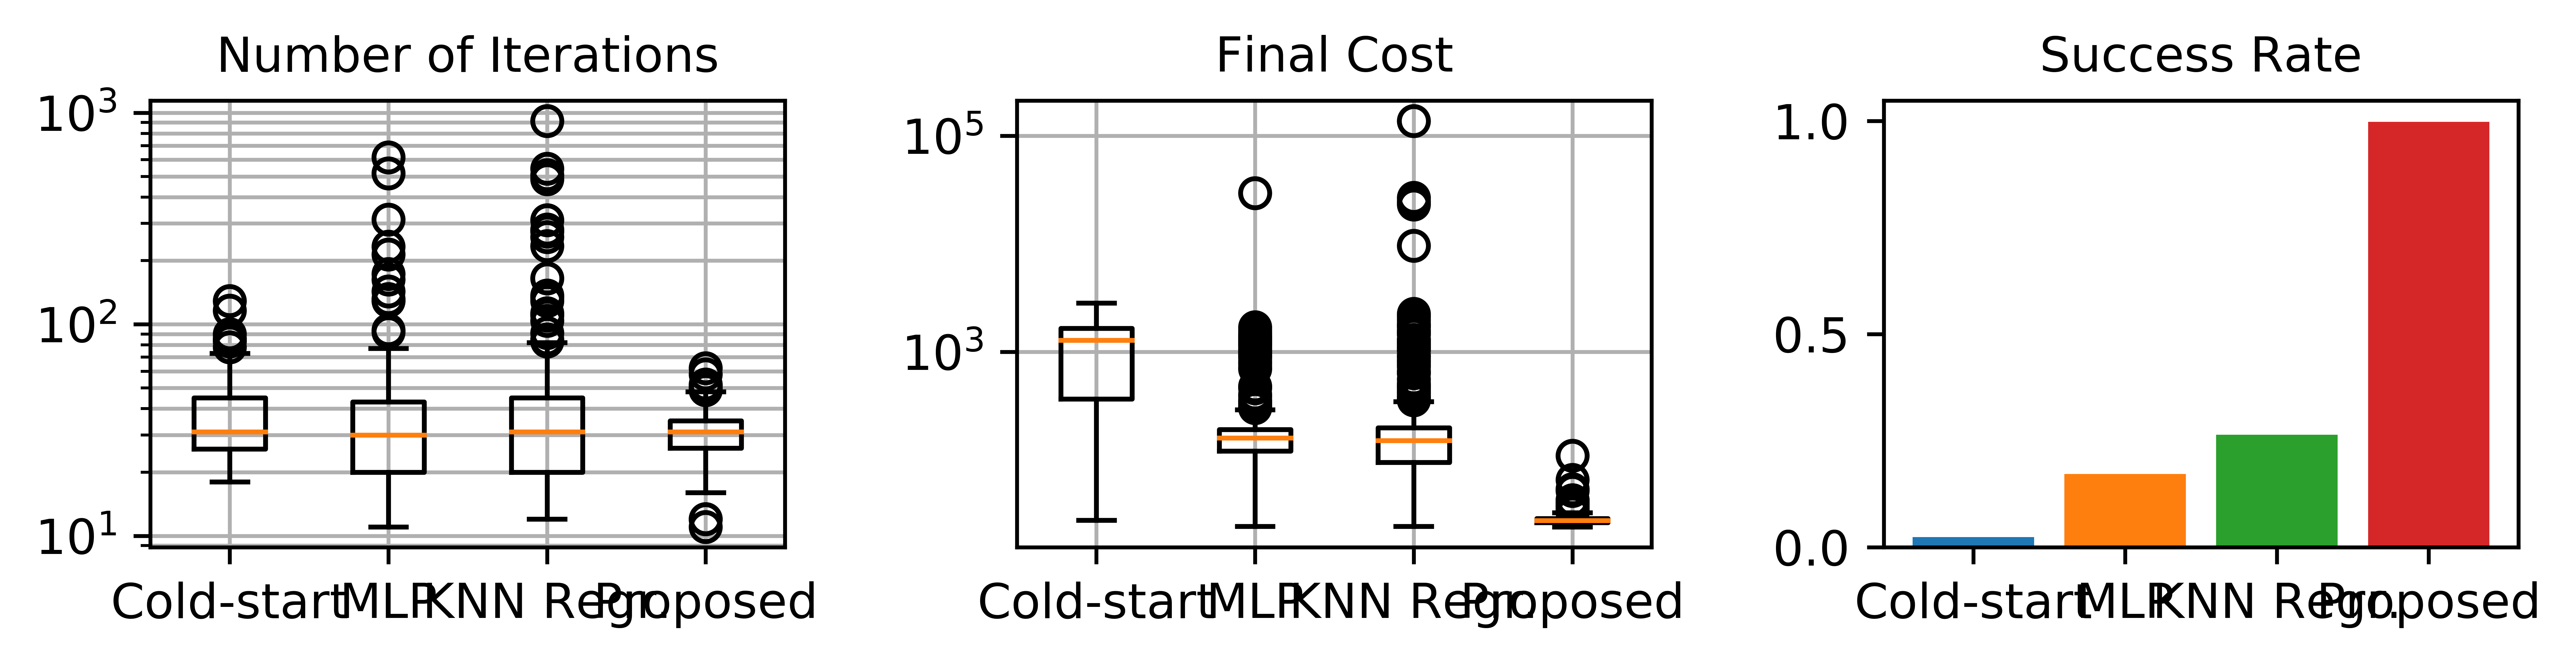

False

In [4]:
success_rate_cost_threshold = 100

avg_iterations = OrderedDict({})
final_costs = OrderedDict({})
convergence_times = OrderedDict({})
success_rates = OrderedDict({})
short_labels = {'Proposed Method': 'Proposed', 'KNN Regressor': 'KNN Regr.', 'Direct learning': 'MLP'}
for label in benchmark_results_random_cost:
    avg_iterations_tmp = np.zeros((len(benchmark_results_random_cost[label]),))
    final_costs_tmp = np.zeros((len(benchmark_results_random_cost[label]),))
    convergence_times_tmp = np.zeros((len(benchmark_results_random_times[label]),))
    for i in range(len(benchmark_results_random_cost[label])):
        avg_iterations_tmp[i] = np.count_nonzero(~np.isnan(benchmark_results_random_cost[label][i]))
        first_nonnan = np.where((np.isnan(benchmark_results_random_cost[label][i]))==True)[0][0] - 1
        final_costs_tmp[i] = benchmark_results_random_cost[label][i][first_nonnan]
        convergence_times_tmp[i] = benchmark_results_random_times[label][i][first_nonnan]

    print(label, "Iterations: {0:.2f} +/- {1:.2f}\t Time: {2:.2f} +/- {3:.2f}".format(avg_iterations_tmp.mean(), avg_iterations_tmp.std(), convergence_times_tmp.mean(), convergence_times_tmp.std()))
    avg_iterations[label] = avg_iterations_tmp.copy()
    final_costs[label] = final_costs_tmp.copy()
    convergence_times[label] = convergence_times_tmp.copy()
    success_rates[label] = np.count_nonzero(final_costs[label] < success_rate_cost_threshold) / np.count_nonzero(final_costs[label])

labels_for_boxplot = []
for key in avg_iterations.keys():
    if key in short_labels:
        labels_for_boxplot.append(short_labels[key])
    else:
        labels_for_boxplot.append(key)
    
fig = plt.figure()
fig.set_dpi(1200)
fig.set_size_inches(7.5,2)
plt.subplot(131)
plt.title('Number of Iterations', fontsize=10)
plt.boxplot(avg_iterations.values(), labels=labels_for_boxplot)
plt.yscale('log')
# plt.ylabel('Iterations')
plt.grid(which='both')

plt.subplot(132)
plt.title('Final Cost', fontsize=10)
plt.boxplot(final_costs.values(), labels=labels_for_boxplot)
plt.yscale('log')
plt.grid(which='both')

plt.subplot(133)
# plt.title('Time to Convergence', fontsize=10)
# plt.boxplot(convergence_times.values(), labels=labels_for_boxplot)
# # plt.yscale('log')
# plt.grid(which='both')

plt.title('Success Rate', fontsize=10)
i = 0
for label in success_rates:
    plt.bar(x=labels_for_boxplot[i], height=success_rates[label])
    print("Success rate for", labels_for_boxplot[i], success_rates[label])
    i+=1

plt.tight_layout()
plt.show()

plot_to_pdf and fig.savefig('plot/warmstart_benchmark_model_comparison_iterations_final_cost_convergence_time_1200dpi.pdf')

# Use Pandas to get plot with time vs cost and shaded region

In [5]:
num_test_cases = len(benchmark_results_random_times['Proposed Method'])

In [6]:
len(benchmark_results_random_cost['Cold-start']), benchmark_results_random_cost['Cold-start'][0].shape

(500, (1001,))

plotting Cold-start
plotting Direct learning
plotting KNN Regressor
plotting Proposed Method
<ipython-input-7-4a8c474e9699>:8: RuntimeWarning: Mean of empty slice
  y_mean = np.nanmean(benchmark_results_random_cost[label], axis=0)
/usr/local/lib/python3.8/dist-packages/numpy/lib/nanfunctions.py:1664: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


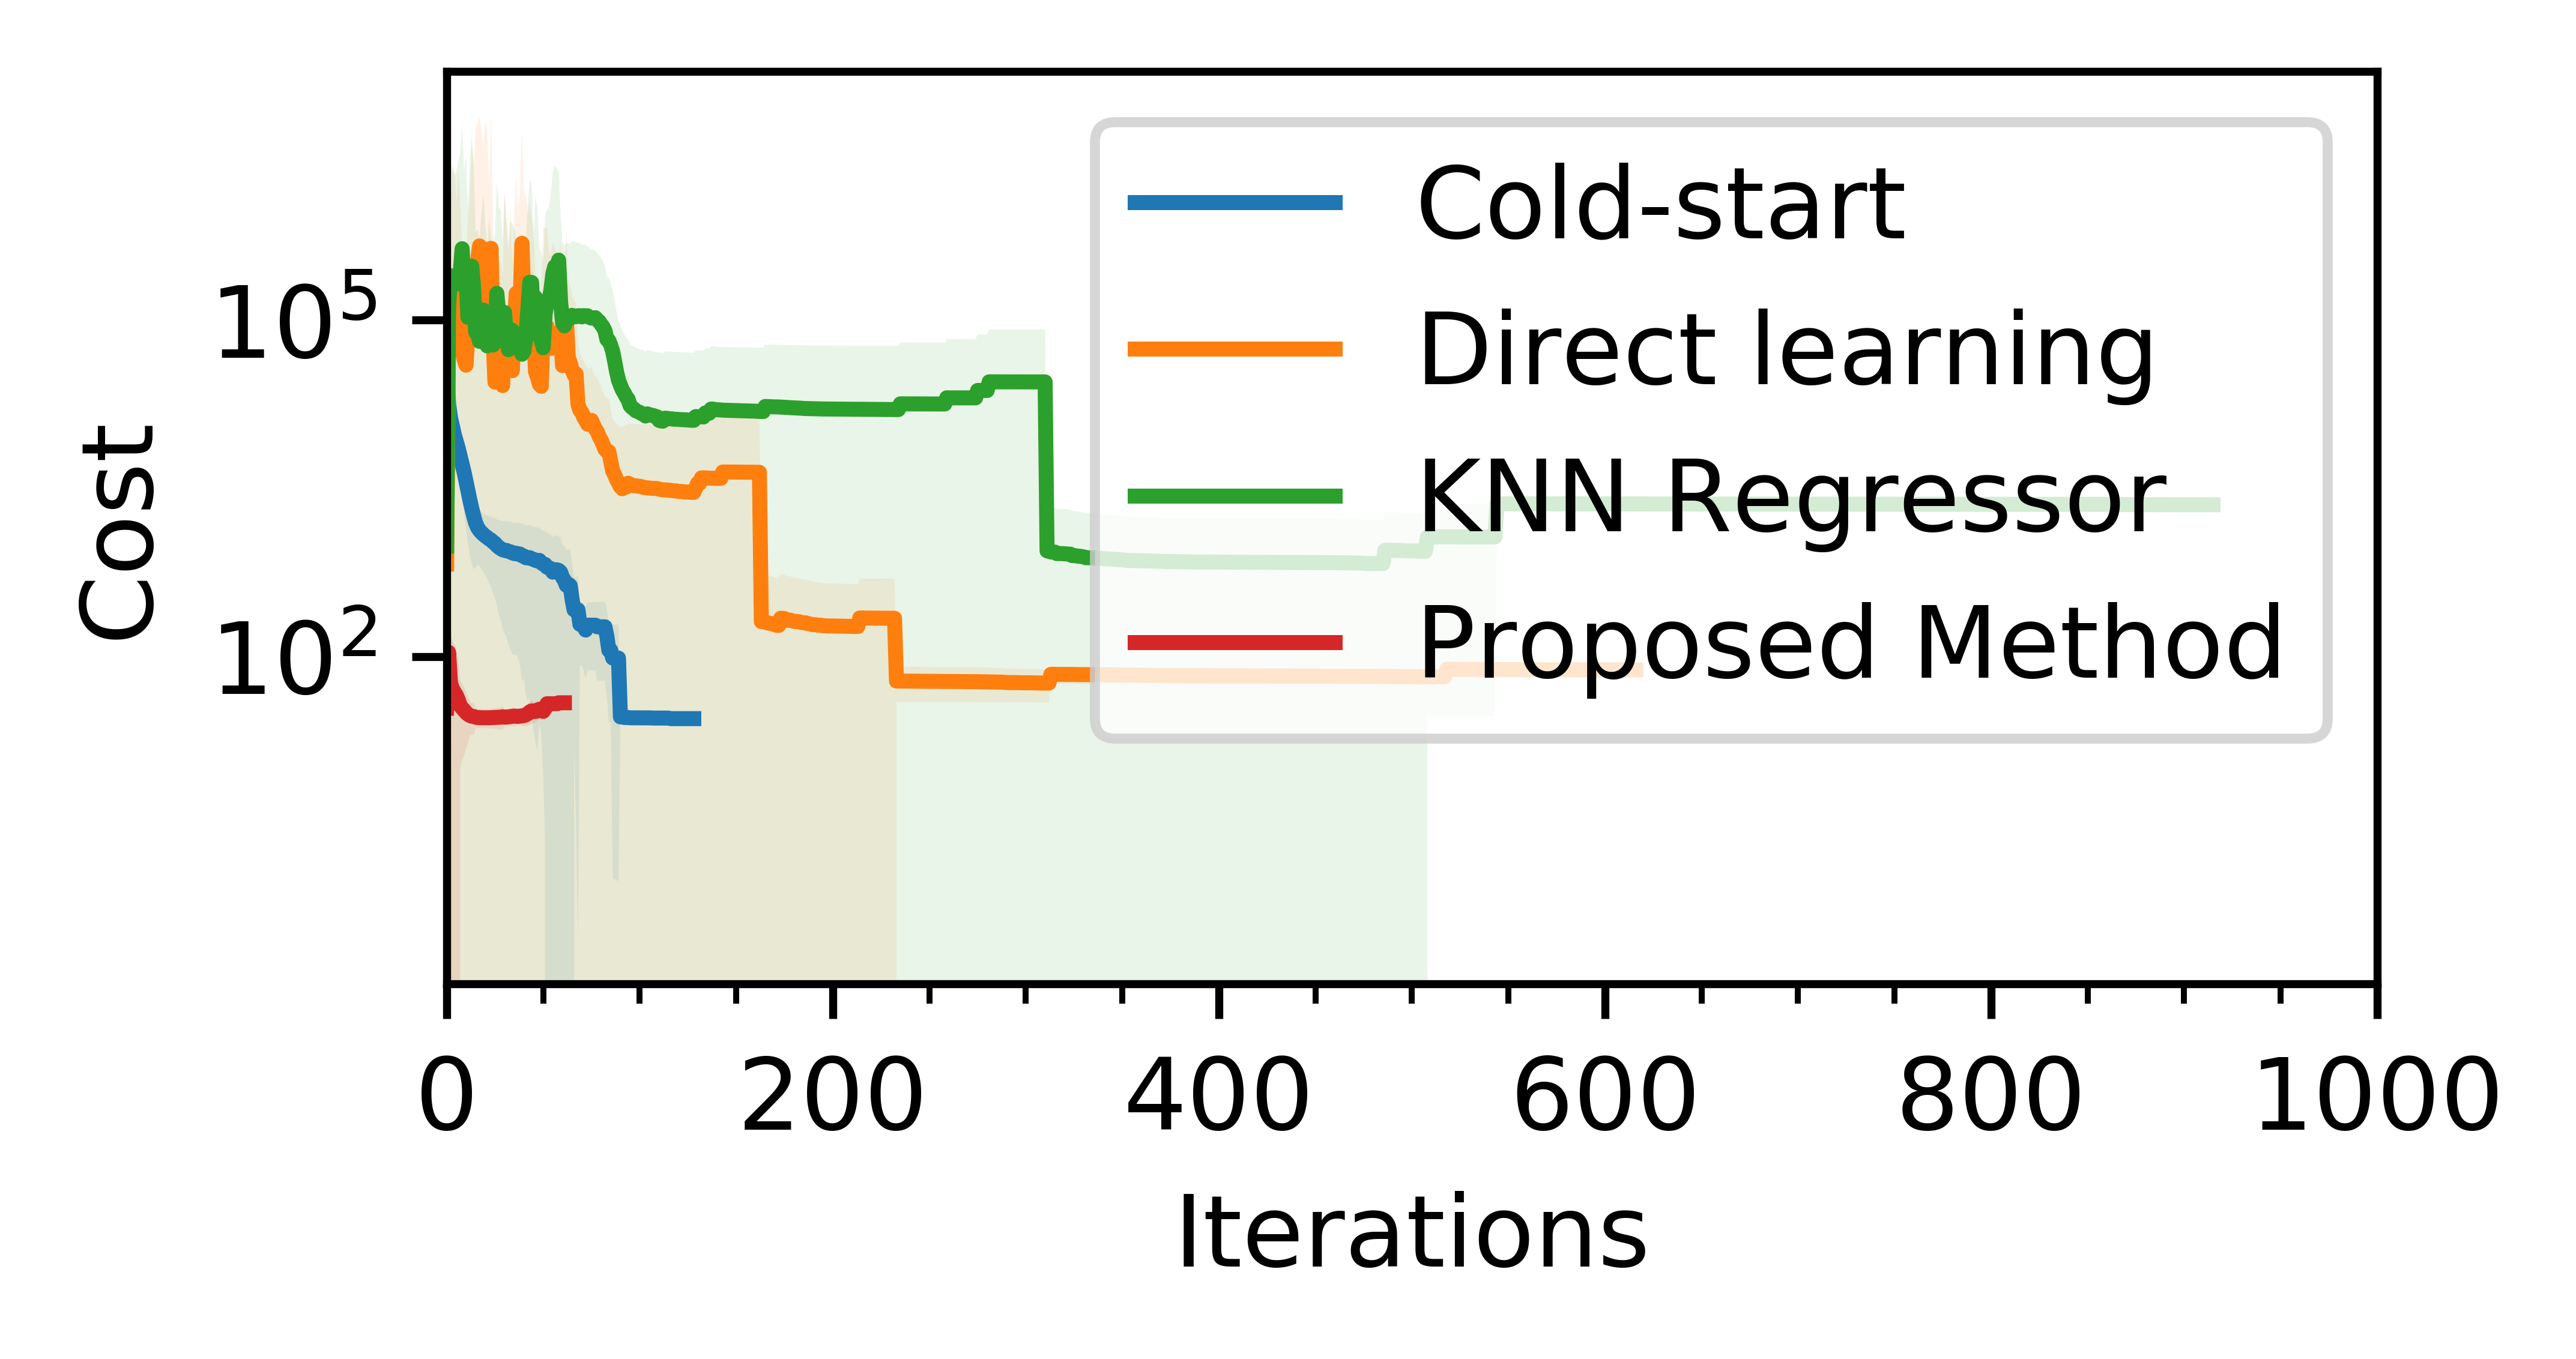

False

In [7]:
fig, ax = plt.subplots()
fig.set_dpi(1200)
fig.set_size_inches(3.5, 2)
x = range(1001)

for label in benchmark_results_random_cost:
    print("plotting", label)
    y_mean = np.nanmean(benchmark_results_random_cost[label], axis=0)
    y_std = np.nanstd(benchmark_results_random_cost[label], axis=0)
    y_plus_std = y_mean + y_std
    y_minus_std = y_mean - y_std
    plt.plot(x, y_mean, label=label)
    ax.fill_between(x, y_minus_std, y_plus_std, alpha=0.1)
plt.yscale('log')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.tight_layout()
plt.minorticks_on()
plt.xlim(0,1000)
plt.show()

plot_to_pdf and fig.savefig('plot/warmstart_benchmark_model_comparison_cost_over_iterations_12d_prediction.pdf')
plot_to_pdf and fig.savefig('plot/warmstart_benchmark_model_comparison_cost_over_iterations_12d_prediction.png')
plot_to_pdf and fig.savefig('plot/warmstart_benchmark_model_comparison_cost_over_iterations_12d_prediction.eps')

In [9]:
avg_iterations = OrderedDict({})
final_costs = OrderedDict({})
convergence_times = OrderedDict({})
short_labels = {'Proposed Method': 'Proposed', 'KNN Regressor': 'KNN Regr.', 'Direct learning': 'MLP'}

s = time.time()
method_dfs = OrderedDict({})
for label in benchmark_results_random_cost:
    print("Method", label)
    df = pd.DataFrame(columns=['dt'] + [str(i) for i in range(num_test_cases)])

    all_dts = []
    for i in range(num_test_cases):
        first_nan = np.where((np.isnan(benchmark_results_random_times[label][i]))==True)[0][0]
        all_dts += benchmark_results_random_times[label][i][:first_nan].tolist()
    
    all_dts = np.unique(np.array(all_dts))
    #all_dts = pd.to_timedelta(all_dts, unit='s')
    df['dt'] = all_dts
    df = df.set_index('dt')

    for i in range(num_test_cases):
        first_nan = np.where((np.isnan(benchmark_results_random_times[label][i]))==True)[0][0]
        for j in range(first_nan):
            df[str(i)][benchmark_results_random_times[label][i][j]] = benchmark_results_random_cost[label][i][j]

    df = df.fillna(method='pad')
    
    if label == 'Direct learning':
        label = 'MLP'

    method_dfs[label] = df.copy()
e = time.time()
print("Processing took {0:.2f}s".format(e-s))

Method Cold-start
Method Direct learning
Method KNN Regressor
Method Proposed Method
Processing took 11.09s


In [10]:
s = time.time()
insert_me = []
for method in method_dfs.keys():
    df2 = method_dfs[method]
    method_name = method
    if method_name in short_labels:
        method_name = short_labels[method_name]
    for column in df2.columns:
        sample = int(column)
        iteration = 0
        for i in df2[column].iteritems():
            #insert_me.append((method, sample, iteration, i[0].total_seconds(), i[1]))
            insert_me.append((method, sample, iteration, i[0], i[1]))
            iteration += 1
df_new = pd.DataFrame(insert_me, columns=['Method', 'Sample', 'Iteration', 'Time (s)', 'Cost'])
e = time.time()
print("Processing took {0:.2f}s".format(e-s))

Processing took 29.43s


# Plotting

In [11]:
# https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set()
sns.set_context("paper")
sns.set_style("ticks") # whitegrid, ticks

In [12]:
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=8) # 10
plt.rc('ytick', labelsize=8) # 10
plt.rc('axes', labelsize=8) # 10
plt.rc('legend', fontsize=8) # 10

In [13]:
df_new['Time (s)'].max()

3.239348958

## Plot Benchmark Cost vs Time (Fig. 8)

In [14]:
s = time.time()
fig = plt.figure()
fig.set_dpi(1200)
fig.set_size_inches(3.5, 2)
# sns.relplot(x='dt', y='cost', hue='method', kind='line', data=df_new)
sns.lineplot(x='Time (s)', y='Cost', hue='Method', data=df_new)
plt.yscale('log')
plt.xlim(0, 3.3)
plt.minorticks_on()
plt.tight_layout()
plt.show()
e = time.time()
print("Plotting took", e-s)

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


ValueError: Failed to parse /usr/share/texlive/texmf-dist/fonts/enc/dvips/base/8r.enc as Postscript encoding

In [ ]:
plot_to_pdf and fig.savefig('plot/benchmark_cost_vs_time_3s.png')
plot_to_pdf and fig.savefig('plot/benchmark_cost_vs_time_3s.pdf')
plot_to_pdf and fig.savefig('plot/benchmark_cost_vs_time_3s.eps')